In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

import nltk
nltk.download('punkt')

In [120]:
with open(r"C:\Users\iulia\Desktop\Ex_Files_Text_Analytics_Predictions_Python_EssT\Exercise Files\code\Course-Descriptions.txt", "r") as fh:
    filedata = fh.read()
    
    
#check contents
print("File data sample: ", filedata[:200])

#create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# Generate wordcloud data 
wordcloud = WordCloud(stopwords = stopwords, max_words =25, \
                     background_color ="white").generate(filedata)

File data sample:  In this practical, hands-on course, learn how to do data preparation, data munging, data visualization, and predictive analytics. 
PHP is the most popular server-side language used to build dynamic we


# Displaying the Wordcloud

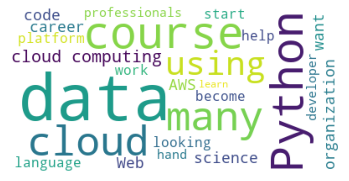

In [121]:
import matplotlib.pyplot as mpLib
mpLib.imshow(wordcloud)
mpLib.axis("off")
mpLib.show()

# Enhancing wordcloud

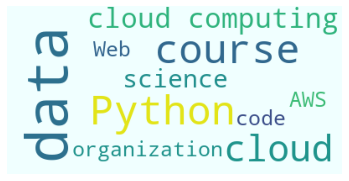

In [122]:
# Add more words to ignore
stopwords.update(["many", "using", "want", "value"])

# Redo stop words. Limit number words 
wordcloud = WordCloud(stopwords = stopwords, max_words=10, \
                     background_color="azure").generate(filedata)

mpLib.imshow(wordcloud)
mpLib.axis("off")
mpLib.show()

# Preparing Data for Sentiment Analysis

In [123]:
# import the movie reviews coprpus

with open(r"C:\Users\iulia\Desktop\Ex_Files_Text_Analytics_Predictions_Python_EssT\Exercise Files\code\Movie-Reviews.txt") as fh:
    reviews = fh.readlines()
print(reviews[:2])

['When your main character in a superhero movie is unwatchable, you already have a problem. In addition, Captain Marvel has no weaknesses, which kills the tension immediately.\n', 'Her performance was forced, uninspiring and flat! Not looking forward to the next movie with "her" in it....\n']


# Finding Sentiment by Review 

In [124]:
# install textblob if not already installed using pip install -U textblob

from textblob import TextBlob
print('{:40} : {:10}'.format("Review", "Polarity","Subjectivity" ))

for review in reviews:
    # find sentiment of a review
    sentiment = TextBlob(review)
    # print individual sentiment
    print('{:40} : {: 01.2f} : {:01.2f}'.format(review[:40]\
                                               , sentiment.polarity, sentiment.subjectivity))

Review                                   : Polarity  
When your main character in a superhero  :  0.17 : 0.33
Her performance was forced, uninspiring  : -0.11 : 0.11
I couldn't believe how boring this movie : -0.51 : 0.72
Nothing beats a good marvel movie, and t :  0.70 : 0.60
This movie did for Marvel what Wonder Wo :  0.60 : 0.68
Captain Marvel just became my favorite s :  0.40 : 0.64
This is a very controversial Marvel film :  0.36 : 0.62
Unfortunately, despite carrying many ele : -0.14 : 0.48
It's worth watching just for the fact th :  0.30 : 0.10
It's great for a first time viewing. Wou :  0.38 : 0.51


Final summarized counts:  [2, 6, 2]

 Pie representation 
---------------------


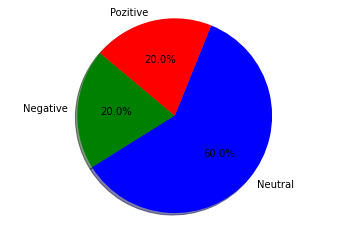

In [125]:
# Categorize Polarity into Pozitive, Neutral and Negative 
labels = ["Negative","Neutral", "Pozitive"]

#initialize count array 
values = [0, 0, 0]

#Categorize each reiview 
for review in reviews:
    sentiment = TextBlob(review)
    
    #custom formula to convert polarity
    # 0 = (Negative) 1 = (Neutral) 2=(Pozitive)
    polarity = round((sentiment.polarity +1 ) *3) %3 
    
    # add the summary array
    values[polarity] = values[polarity] + 1
    
print("Final summarized counts: ", values)

# set colors by label 
colors = ["Green", "Blue", "Red"]

print("\n Pie representation \n---------------------")
#Plot a pie chart 
plt.pie(values, labels = labels, colors = colors, \
       autopct='%1.1f%%', shadow = True, startangle=140)
plt.axis('equal')
plt.show()

# Preparing Text for Clustering - Unsupervized Learning


In [126]:
#Load course hashtags
hashtags_df = pd.read_csv(r"C:\Users\iulia\Desktop\Ex_Files_Text_Analytics_Predictions_Python_EssT\Exercise Files\code\Course-Hashtags.csv")
print("\nSample hashtags data :")
print(hashtags_df[:2])


Sample hashtags data :
                            Course                             HashTags
0  Apache Spark Essential Training  BigData,DataScience,MachineLearning
1           Java Memory Management            Java,Advanced,Programming


In [127]:
# Separate Hashtags and titles to lists
hash_list = hashtags_df["HashTags"].tolist()
title_list = hashtags_df ["Course"].tolist()

In [128]:
# using the TF-IDF vectorizing for feature extraction 
# Do TF-IDF conversion of hashtags
from sklearn.feature_extraction.text import TfidfVectorizer

vectorrizer = TfidfVectorizer(stop_words='english')
hash_matrix = vectorrizer.fit_transform(hash_list)
print("\n Feature names Identified: \n")
print(vectorrizer.get_feature_names())


 Feature names Identified: 

['advanced', 'automation', 'bigdata', 'datascience', 'design', 'developer', 'gcp', 'graphics', 'hadoop', 'ide', 'intermediate', 'java', 'jdbc', 'kubernetes', 'machinelearning', 'patterns', 'programming', 'python', 'scala', 'scripting']


# Clustering TF-IDF data

In [129]:
# Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

# Split data into 3 clusters
kmeans = KMeans(n_clusters=3).fit(hash_metrix)

#get Cluster labels 
clusters = kmeans.labels_

# Print cluster label and Courses under each cluster 
for group in set(clusters):
    print("\nGroup: ", group, "\n ----------------")
    
    for i in hashtags_df.index:
        if(clusters[i] == group):
            print(title_list[i])


Group:  0 
 ----------------
Java Memory Management
Java : Database Integration and JDBC
R Programming
Java IDE Overview
Kubernetes for Java Developers

Group:  1 
 ----------------
Python Automation and Testing
Python for Graphics
Python Design Patterns
Python Scripting

Group:  2 
 ----------------
Apache Spark Essential Training
Machine Learning and AI Foundations
Hadoop for Data Science
Data Science on Google Cloud Platform
Scala for Data Science


# Finding optimal Cluster size

Sum of squared distances:  [11.433022387031059, 9.055813116540266, 6.7610661721912155, 5.6283212260073165, 4.817093184201766, 4.208226187063666, 3.509889645555115, 2.8186260066230613, 2.522474066043382, 1.807779789051295, 1.3264482360674248, 0.8457910455266846, 0.40164181287464107, 2.220446049250313e-16]


Text(0.5, 1.0, 'Elbow Method For Optimal Clsuter Size')

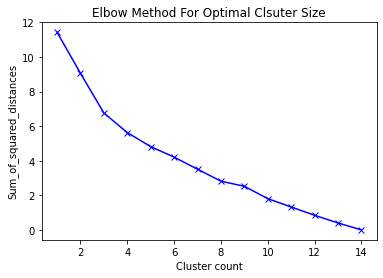

In [130]:
# find optimal cluster size by finding sum-of-squared-distances

sosd=[]
# Run clusterinf for sizes 1 to 15 and catpure inertia
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(hash_matrix)
    sosd.append(km.inertia_)
    
print("Sum of squared distances: ", sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as plt
mpLib.plot(K, sosd, "bx-")
mpLib.xlabel("Cluster count")
mpLib.ylabel("Sum_of_squared_distances")
mpLib.title("Elbow Method For Optimal Clsuter Size")

# Classifying Text Data - Supervised learning

In [131]:
# Read course description 
with open(r"C:\Users\iulia\Desktop\Ex_Files_Text_Analytics_Predictions_Python_EssT\Exercise Files\code\Course-Descriptions.txt") as fh:
    descriptions = fh.read().splitlines()
print("Sample course descriptions: ", descriptions[:2])



Sample course descriptions:  ['In this practical, hands-on course, learn how to do data preparation, data munging, data visualization, and predictive analytics. ', 'PHP is the most popular server-side language used to build dynamic websites, and though it is not especially difficult to use, nonprogrammers often find it intimidating. ']


In [ ]:
#Setup stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#setup wordnet for lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Custom tokenizer that will perform tokenization. stopword removal 
#and lemmatization 

def customtokenize (str):
    tokens = nltk.word_tokenize(str)
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    lemmatized = [lemmatizer.lemmatize(word) for word in nostop]
    return lemmatized


In [135]:
#Generate TFIDF matrix
vectorizer = TfidfVectorizer(tokenizer=customtokenize)
tfidf=vectorizer.fit_transform(descriptions)

print("\nSample feature names identified : ", vectorizer.get_feature_names()[:25])
print("\nSize of TFIDF matrix : ",tfidf.shape)


Sample feature names identified :  ["'ll", "'re", "'s", '(', ')', ',', '.', '?', 'actively', 'adopting', 'amazon', 'analysis', 'analytics', 'application', 'applied', 'architect', 'architecture', 'around', 'aspect', 'associate', 'aws', 'basic', 'become', 'begin', 'big']

Size of TFIDF matrix :  (20, 240)


In [ ]:
with open("Course-Descriptions.txt", 'r') as fh:  
    descriptions = fh.read().splitlines()
print("Sample course descriptions :", descriptions[:2])

#Setup stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#setup wordnet for lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from sklearn.feature_extraction.text import TfidfVectorizer

#Custom tokenizer that will perform tokenization, stopword removal
#and lemmatization
def customtokenize(str):
    tokens=nltk.word_tokenize(str)
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]
    return lemmatized

#Generate TFIDF matrix
vectorizer = TfidfVectorizer(tokenizer=customtokenize)
tfidf=vectorizer.fit_transform(descriptions)

print("\nSample feature names identified : ", vectorizer.get_feature_names()[:25])
print("\nSize of TFIDF matrix : ",tfidf.shape)

# Building the model

In [141]:
#loading the pre-build classifications for training

with open(r"C:\Users\iulia\Desktop\Ex_Files_Text_Analytics_Predictions_Python_EssT\Exercise Files\code\Course-Classification.txt") as fh:
    classifications = fh.read().splitlines()
    
# Create Labels and integer calsses 
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(classifications)
print("Classes found: ", le.classes_)

#Convert classes to integers for use with Ml
int_classes = le.transform(classifications)
print("\nClasses converted to integers: ", int_classes)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

#Split as training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(tfidf, int_classes, random_state=0)

#Build the model 
classifier = MultinomialNB().fit(xtrain, ytrain)


Classes found:  ['Cloud-Computing' 'Data-Science' 'Programming']

Classes converted to integers:  [1 2 2 0 1 2 1 2 0 1 1 2 2 0 2 0 0 0 2 2]


# Running Predictions 

In [144]:
from sklearn import metrics

print("Testing with Test Data: \n-----------------")
#Predict on test data
predictions = classifier.predict(xtest)
print("Confusion Matrix: ")
print(metrics.confusion_matrix(ytest, predictions))
print("\n Prediction Accuracy: ", \
     metrics.accuracy_score(ytest, predictions))

print("\nTesting with Full Corpus: \n--------------------")
# Predict on entire corpus data
predictions = classifier.predict(tfidf)
print("Confusion Matrix: ")
print(metrics.confusion_matrix(int_classes, predictions))
print("\n Prediction Accuracy: ", 
     metrics.accuracy_score(int_classes, predictions))


Testing with Test Data: 
-----------------
Confusion Matrix: 
[[1 0 0]
 [0 0 1]
 [1 0 2]]

 Prediction Accuracy:  0.6

Testing with Full Corpus: 
--------------------
Confusion Matrix: 
[[6 0 0]
 [0 4 1]
 [1 0 8]]

 Prediction Accuracy:  0.9


# Predictive text

In [154]:
import os  
# read course description file 
base_file = open(r"C:\Users\iulia\Desktop\Ex_Files_Text_Analytics_Predictions_Python_EssT\Exercise Files\code\Course-Descriptions.txt")
raw_text = base_file.read()
base_file.close()
print("Text read from file: ", raw_text[:200])

#tokenization
import nltk 
token_list = nltk.word_tokenize(raw_text)


#Replace special characters 
token_list2 = [word.replace("'", "") for word in token_list]

#Remove punctuations
token_list3 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list2))

#Convert to lower case
token_list4 = [word.lower() for word in token_list3]

print("\nSample token list: ", token_list4[:10])
print("\nTotal Token : ", len(token_list4))


Text read from file:  In this practical, hands-on course, learn how to do data preparation, data munging, data visualization, and predictive analytics. 
PHP is the most popular server-side language used to build dynamic we

Sample token list:  ['in', 'this', 'practical', 'hands-on', 'course', 'learn', 'how', 'to', 'do', 'data']

Total Token :  579


# Building the ngrams DB

In [159]:
from nltk import ngrams

#Use sqlite database to store ngrams information 
import sqlite3
conn = sqlite3.connect(":memory:")

#table to store first word, second word and count of accurance
conn.execute(''' DROP TABLE IF EXISTS  NGRAMS ''')
conn.execute('''CREATE TABLE NGRAMS
(FIRST TEXT NOT NULL, 
SECOND TEXT NOT NULL, 
COUNTS INT NOT NULL, 
CONSTRAINT PG_GRAMS PRIMARY KEY(FIRST, SECOND)); ''')

#Generate bigrams
bigrams = ngrams(token_list4, 2)

#Store bigrams in DB
for i in bigrams:
    insert_str = "INSERT INTO NGRAMS(FIRST, SECOND, COUNTS)\
    VALUES('" +i[0] +"', '" +i[1] + "', 1)\
    ON CONFLICT(FIRST, SECOND) DO UPDATE SET COUNTS = COUNTS +1 "
    conn.execute(insert_str);
    
#Look at sample data from the table
cursor = conn.execute("SELECT FIRST, SECOND, COUNTS from NGRAMS LIMIT 5")
for gram_row in cursor:
    print("FIRST=", gram_row[0], "SECOND=", gram_row[1], "COUNT=", gram_row[2])

FIRST= in SECOND= this COUNT= 2
FIRST= this SECOND= practical COUNT= 1
FIRST= practical SECOND= hands-on COUNT= 1
FIRST= hands-on SECOND= course COUNT= 1
FIRST= course SECOND= learn COUNT= 1


# Recommending next word


In [ ]:
# Function to query DB and find next word 
def recommend(str):
    nextwords = []
    # Find next words, sort them by most occurency
    cur_filter = conn.execute("SELECT SECOND from NGRAMS\
                                WHERE FIRST = '" + str +"'\
                                ORDER BY COUNTS DESC")
    #Build a list ordered from most frequent to least frequent next word
    for file_row in cur_filter:
        nextwords.append(file_row[0])
    return nextwords
    
#Recommend fo rwords data and science
print("Next word for data ", recommend("data"))
("\nNext word for science ", recommend("science"))